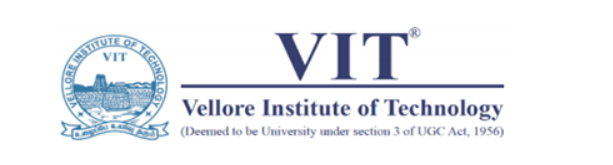
SCHOOL OF COMPUTER SCIENCE ENGINEERING
FALL SEMESTER 2021-2022
                                     
NAME: Valliammai.V <br>
REG NO: 19MID0124 <br>
COURSE CODE: MDI4001 <br>
FACULTY: Dr.ABDUL GAFFAR H<br>  
SUBJECT: Machine Learning for Data Science (ETH)<br> 
ASSIGNMENT NO: 1<br>
QUESTION:Personality predictions

In [1]:
import re
import numpy as np
import collections
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

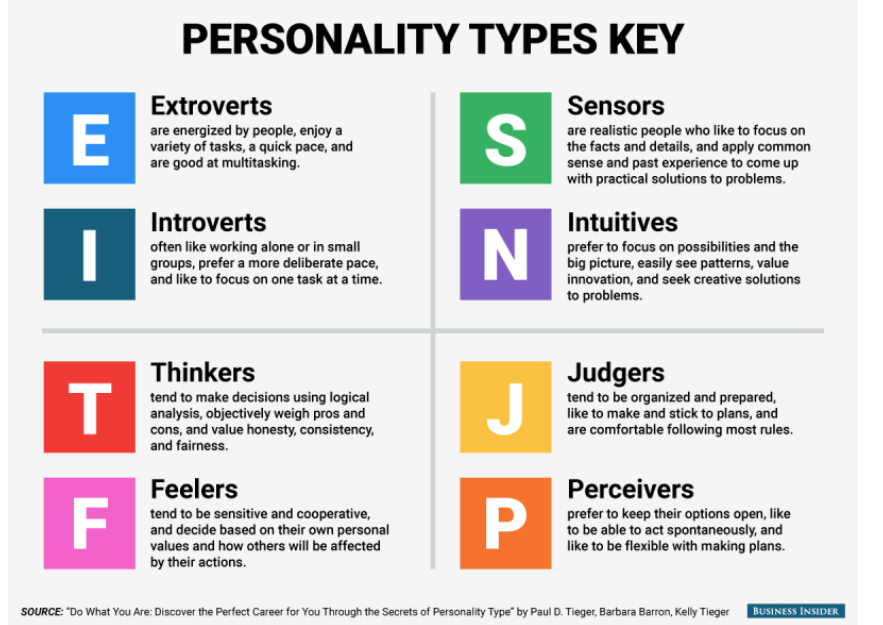
##### The dataset contains ~8600 observations (people), where each observation gives a person’s:
  ###### Myers-Briggs personality type (as a 4-letter code)
  ###### An excerpt containing the last 50 posts on their PersonalityCafe forum (each entry separated by “|||”)

#### The Myers–Briggs Type Indicator (MBTI) is a kind of psychological classification about humans experience using four principal psychological functions, sensation, intuition, feeling, and thinking, constructed by Katharine Cook Briggs and her daughter Isabel Briggs Myers.

In [2]:
df = pd.read_csv('mbti_1.csv')
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None


In [4]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


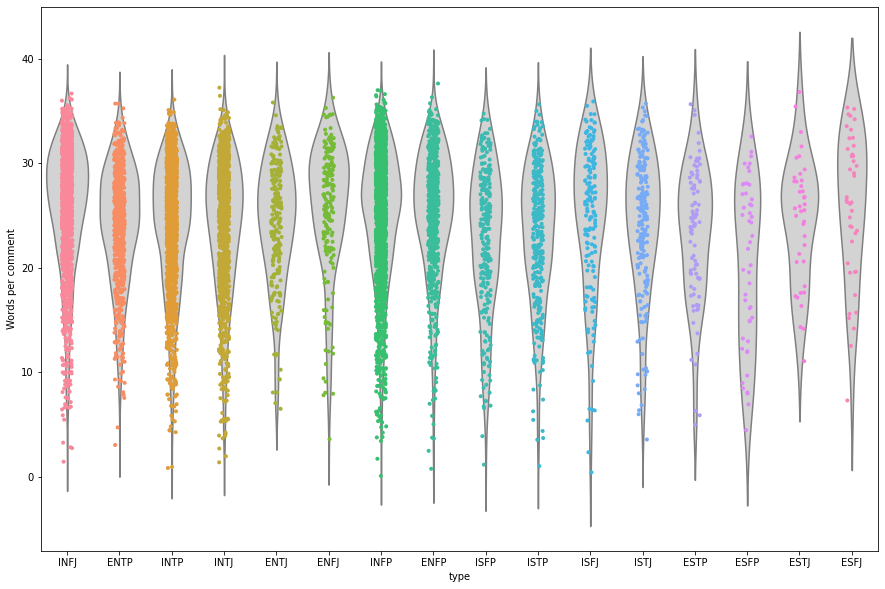

In [5]:
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

In [6]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)


In [7]:
i = df['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,6):
        df_2 = df[df['type'] == i[k]] 
        k+=1

In [8]:
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)
print(df.head(10))

   type                                              posts  words_per_comment  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12   
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40   
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28   
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...              29.82   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...              26.58   
7  INTJ  'I tend to build up a collection of things on ...              24.46   
8  INFJ  I'm not sure, that's a good question. The dist...              14.76   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...              24.66   

   http_per_comment  music_per_comment  question_per_comment  img_per_comment  \
0              0.48        

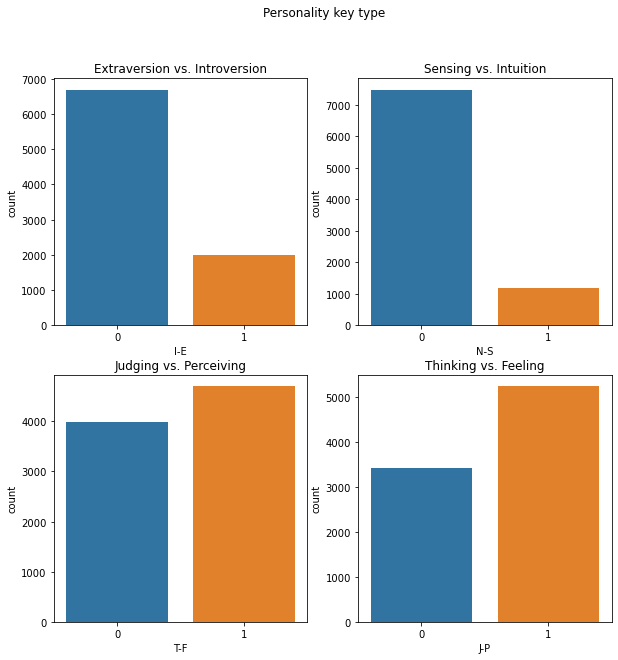

In [9]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.subplot(2, 2, 1)
sns.countplot(x=df['I-E'])
plt.title("Extraversion vs. Introversion")
plt.subplot(2, 2, 2)
sns.countplot(x=df['N-S'])
plt.title("Sensing vs. Intuition")
plt.subplot(2, 2, 3)
sns.countplot(x=df['T-F'])
plt.title("Judging vs. Perceiving")
plt.subplot(2, 2, 4)
sns.countplot(x=df['J-P'])
plt.title("Thinking vs. Feeling")
plt.suptitle("Personality key type")
plt.show()

In [10]:
X = df.drop(['type','posts','I-E','N-S','T-F','J-P'], axis=1).values
y = df['type'].values

print(y.shape)
print(X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=6)

(8675,)
(8675, 7)


In [11]:
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[  0   5   1   0  31   0   0   0   0   0   0   0   0   0   0   2]
 [  0  13   1   0  91   0   0   0   0   0   0   0   0   0   0   3]
 [  0   3   0   0  47   0   0   0   0   0   0   0   0   0   0   2]
 [  0   4   1   0 105   0   0   0   0   0   0   0   0   0   0  15]
 [  0   1   0   0   7   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   6   0   0   0   0   0   0   0   0   0   0   2]
 [  0   0   0   0  11   0   0   0   0   0   0   0   0   0   0   2]
 [  0   1   0   0  21   0   0   0   0   0   0   0   0   0   0   4]
 [  0  10   7   0 267   0   0   0   0   0   0   0   0   0   0  15]
 [  0  14   8   0 313   0   0   0   0   0   0   0   0   0   0  20]
 [  0   1   8   0 210   0   0   0   0   0   0   0   0   0   0  29]
 [  0   4   1   0 226   0   0   0   0   0   0   0   0   0   0  25]
 [  0   1   1   0  33   0   0   0   0   0   0   0   0   0   0   5]
 [  0   5   4   0  33   0   0   0   0   0   0   0   0   0   0  11]
 [  0   3   0   0  41   0   0   0   0   0   0   0   0   0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score ='TRUE',n_jobs = 1,random_state =36)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)
confusion = metrics.confusion_matrix(y_train, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_train, y_pred))
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[ 151    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  567    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0  179    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0  560    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0   34    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0   39    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0   26    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0   63    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0 1171    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0 1477    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0  843    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1048

In [13]:
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[  0   3   0   0   0   0   0   0   3  30   0   3   0   0   0   0]
 [  0   6   0   0   0   0   0   0   9  80   0  13   0   0   0   0]
 [  0   2   0   0   0   0   0   0   1  30   0  19   0   0   0   0]
 [  0   4   0   0   0   0   0   0  10  76   0  35   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   5   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   7   0   4   0   0   0   0]
 [  0   1   0   0   0   0   0   0   3  15   0   7   0   0   0   0]
 [  0   5   0   0   0   0   0   0  26 219   0  49   0   0   0   0]
 [  0   7   0   0   0   0   0   0  20 282   0  46   0   0   0   0]
 [  0   0   0   0   0   0   0   0  10 137   0 101   0   0   0   0]
 [  0   3   0   0   0   0   0   0  11 157   0  85   0   0   0   0]
 [  0   1   0   0   0   0   0   0   4  26   0   9   0   0   0   0]
 [  0   3   0   0   0   0   0   0   4  35   0  11   0   0   0   0]
 [  0   1   0   0   0   0   0   0   5  33   0   7   0   0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

confusion = metrics.confusion_matrix(y_train, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_train, y_pred))
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[129   1   0   1   0   0   0   0   3   5   6   5   0   0   0   1]
 [ 21 477   0   2   0   0   0   0  23  23   7  13   0   1   0   0]
 [  8  22 133   2   0   0   0   0   5   5   0   4   0   0   0   0]
 [ 24  69  30 372   0   0   0   0  12  19  19  14   0   1   0   0]
 [  1   4   4   3  16   0   0   0   2   2   0   2   0   0   0   0]
 [  3  10   2   3   0  17   0   0   3   0   0   1   0   0   0   0]
 [  3   6   0   5   0   0  10   0   0   0   1   1   0   0   0   0]
 [  0   6   6  12   1   1   0  33   2   0   1   1   0   0   0   0]
 [ 54 153  39 116   5   5   4  17 664  58  24  29   0   1   1   1]
 [ 52 172  70 131   6   6   5  16 211 734  29  42   1   1   0   1]
 [ 18  92  35 104   5   9   4  13 139 125 261  35   0   0   0   3]
 [ 28  94  42 116   5   3   5  14 182 145  49 357   1   1   2   4]
 [  1  25   5  18   3   0   1   4  25  26   6   6   5   0   0   1]
 [  5  29  14  33   2   3   0   1  37  39  16  16   0  22   0   1]
 [  9  12   6  29   1   2   0   6  27  30  11  18   0   2 

In [15]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators = 1000) 
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)

print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[129   1   0   1   0   0   0   0   3   5   6   5   0   0   0   1]
 [ 21 477   0   2   0   0   0   0  23  23   7  13   0   1   0   0]
 [  8  22 133   2   0   0   0   0   5   5   0   4   0   0   0   0]
 [ 24  69  30 372   0   0   0   0  12  19  19  14   0   1   0   0]
 [  1   4   4   3  16   0   0   0   2   2   0   2   0   0   0   0]
 [  3  10   2   3   0  17   0   0   3   0   0   1   0   0   0   0]
 [  3   6   0   5   0   0  10   0   0   0   1   1   0   0   0   0]
 [  0   6   6  12   1   1   0  33   2   0   1   1   0   0   0   0]
 [ 54 153  39 116   5   5   4  17 664  58  24  29   0   1   1   1]
 [ 52 172  70 131   6   6   5  16 211 734  29  42   1   1   0   1]
 [ 18  92  35 104   5   9   4  13 139 125 261  35   0   0   0   3]
 [ 28  94  42 116   5   3   5  14 182 145  49 357   1   1   2   4]
 [  1  25   5  18   3   0   1   4  25  26   6   6   5   0   0   1]
 [  5  29  14  33   2   3   0   1  37  39  16  16   0  22   0   1]
 [  9  12   6  29   1   2   0   6  27  30  11  18   0   2 

In [18]:
random_forest = RandomForestClassifier(n_estimators = 100,min_samples_split=2,random_state =35)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)
confusion = metrics.confusion_matrix(y_train, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_train, y_pred))
accuracy = metrics.accuracy_score(y_train, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[ 151    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0  567    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0  179    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0  560    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0   34    0    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0   39    0    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0   26    0    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0   63    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0 1171    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0 1477    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0  843    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    0    0    0 1048

In [19]:
pd.DataFrame(
    {
         "Model":["Stochastic Gradient Descent","Random Forest","KNN","Logistic Regression","Adabooster"],
         "Training accuarcy":[sgd.score(X_train, y_train),random_forest.score(X_train,y_train),knn.score(X_train,y_train),logreg.score(X_train,y_train),Ada.score(X_train,y_train)],
         "Testing accuarcy":[sgd.score(X_test, y_test),random_forest.score(X_test,y_test),knn.score(X_test,y_test),logreg.score(X_test,y_test),Ada.score(X_test,y_test)]
        
    }
)

,Model,Training accuarcy,Testing accuarcy
0,Stochastic Gradient Descent,0.021758,0.017291
1,Random Forest,1.000000,0.211527
2,KNN,0.469020,0.149280
3,Logistic Regression,0.236311,0.229971
4,Adabooster,0.045821,0.036311
